                      title    budget    revenue     profit
0  The Shawshank Redemption  25000000   28341469    3341469
1             The Godfather   6000000  245066411  239066411
2     The Godfather Part II  13000000  102600000   89600000
3          Schindler's List  22000000  321365567  299365567
4              12 Angry Men    397751    4360000    3962249


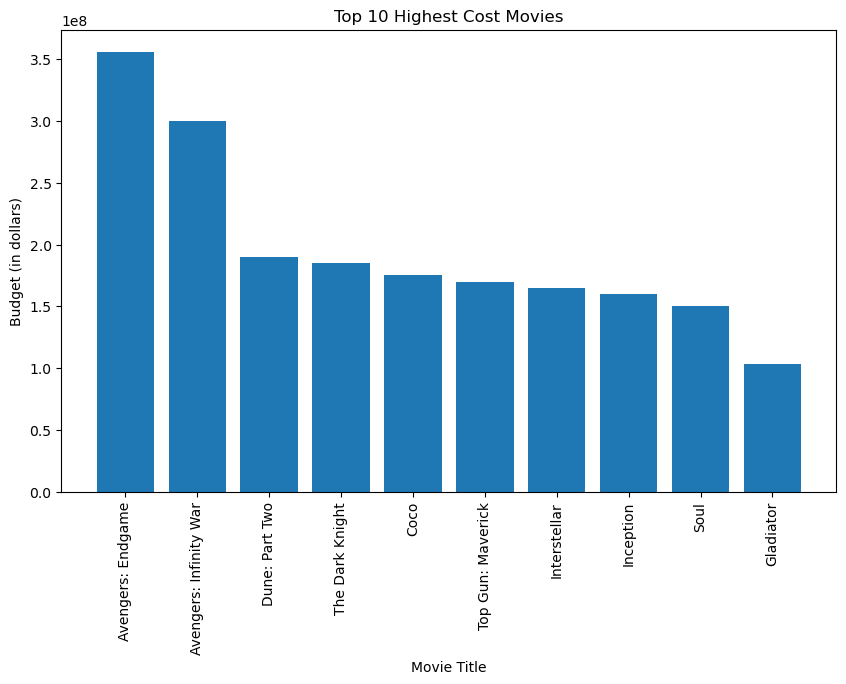

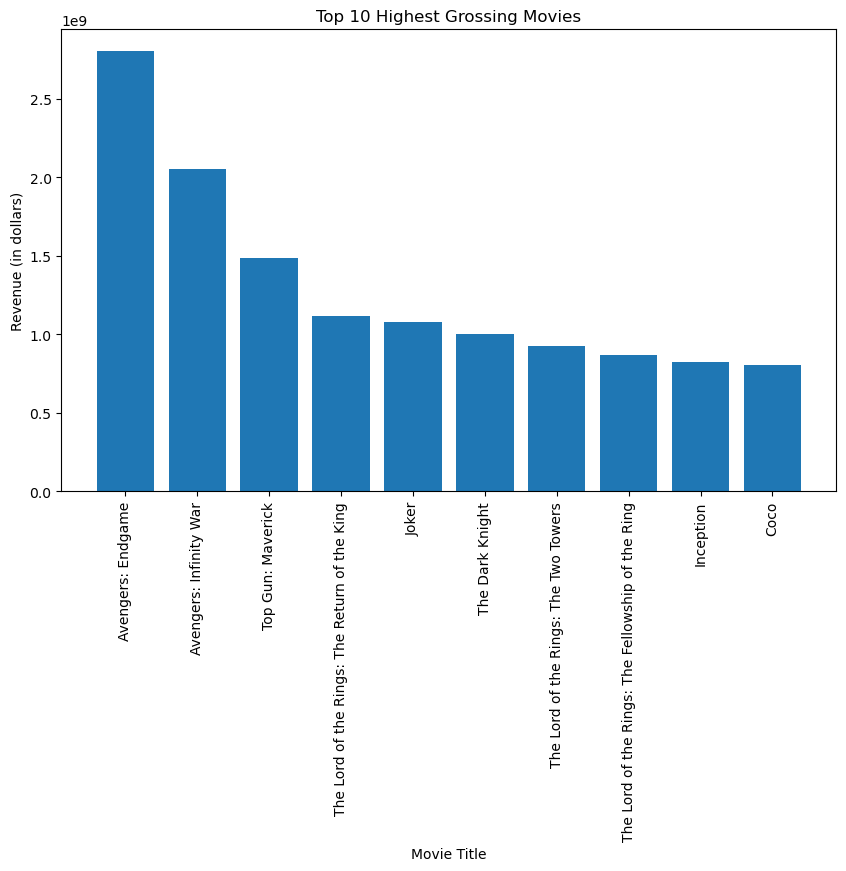

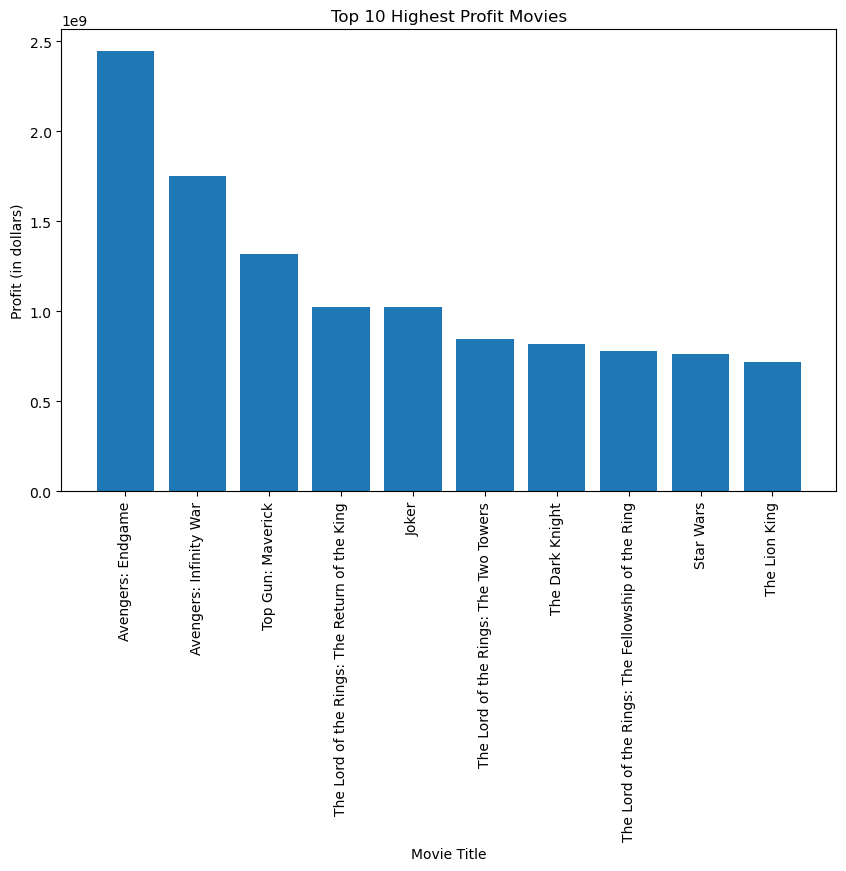

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define API Key and base URL
#replace with your api key, removed before placing on github
tmdb_api_key = ""
tmdb_base_url = 'https://api.themoviedb.org/3/'

# Function to fetch top rated movies
def fetch_top_rated_movies(api_key, pages=1):
    movies = []
    for page in range(1, pages + 1):
        url = f'{tmdb_base_url}movie/top_rated?api_key={api_key}&language=en-US&page={page}'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            movies.extend(data['results'])
        else:
            print(f"Error fetching data: {response.status_code}")
            break
    return movies

# Function to fetch movie details including budget and revenue
def fetch_movie_details(api_key, movie_id):
    url = f'{tmdb_base_url}movie/{movie_id}?api_key={api_key}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for movie ID {movie_id}: {response.status_code}")
        return {}

# Fetch top rated movies
top_rated_movies = fetch_top_rated_movies(tmdb_api_key, pages=10)  # Fetch data for 10 pages

# Convert to DataFrame
movies_df = pd.DataFrame(top_rated_movies)

# Fetch additional details for each movie
movie_details_data = []
for movie_id in movies_df['id']:
    details = fetch_movie_details(tmdb_api_key, movie_id)
    if details:
        movie_details_data.append(details)

# Convert to DataFrame if there are details
if movie_details_data:
    movie_details_df = pd.DataFrame(movie_details_data)

# Filter out movies with missing budget or revenue data
movie_details_df = movie_details_df.dropna(subset=['budget', 'revenue'])

# Ensure budget and revenue are numeric
movie_details_df['budget'] = pd.to_numeric(movie_details_df['budget'])
movie_details_df['revenue'] = pd.to_numeric(movie_details_df['revenue'])

# Calculate profit as the difference between revenue and budget
movie_details_df['profit'] = movie_details_df['revenue'] - movie_details_df['budget']

# Display the DataFrame with the profit column
print(movie_details_df[['title', 'budget', 'revenue', 'profit']].head())

# Sort the DataFrame by budget in descending order and select the top 10 movies
top_10_cost_movies = movie_details_df.sort_values(by='budget', ascending=False).head(10)

# Plot the top 10 highest cost movies
plt.figure(figsize=(10, 6))
plt.bar(top_10_cost_movies['title'], top_10_cost_movies['budget'])
plt.xlabel('Movie Title')
plt.ylabel('Budget (in dollars)')
plt.title('Top 10 Highest Cost Movies')
plt.xticks(rotation=90)
plt.show()

# Sort the DataFrame by revenue in descending order and select the top 10 movies
top_10_grossing_movies = movie_details_df.sort_values(by='revenue', ascending=False).head(10)

# Plot the top 10 highest grossing movies
plt.figure(figsize=(10, 6))
plt.bar(top_10_grossing_movies['title'], top_10_grossing_movies['revenue'])
plt.xlabel('Movie Title')
plt.ylabel('Revenue (in dollars)')
plt.title('Top 10 Highest Grossing Movies')
plt.xticks(rotation=90)
plt.show()

# Sort the DataFrame by profit in descending order and select the top 10 movies
top_10_profit_movies = movie_details_df.sort_values(by='profit', ascending=False).head(10)

# Plot the top 10 highest profit movies
plt.figure(figsize=(10, 6))
plt.bar(top_10_profit_movies['title'], top_10_profit_movies['profit'])
plt.xlabel('Movie Title')
plt.ylabel('Profit (in dollars)')
plt.title('Top 10 Highest Profit Movies')
plt.xticks(rotation=90)
plt.show()


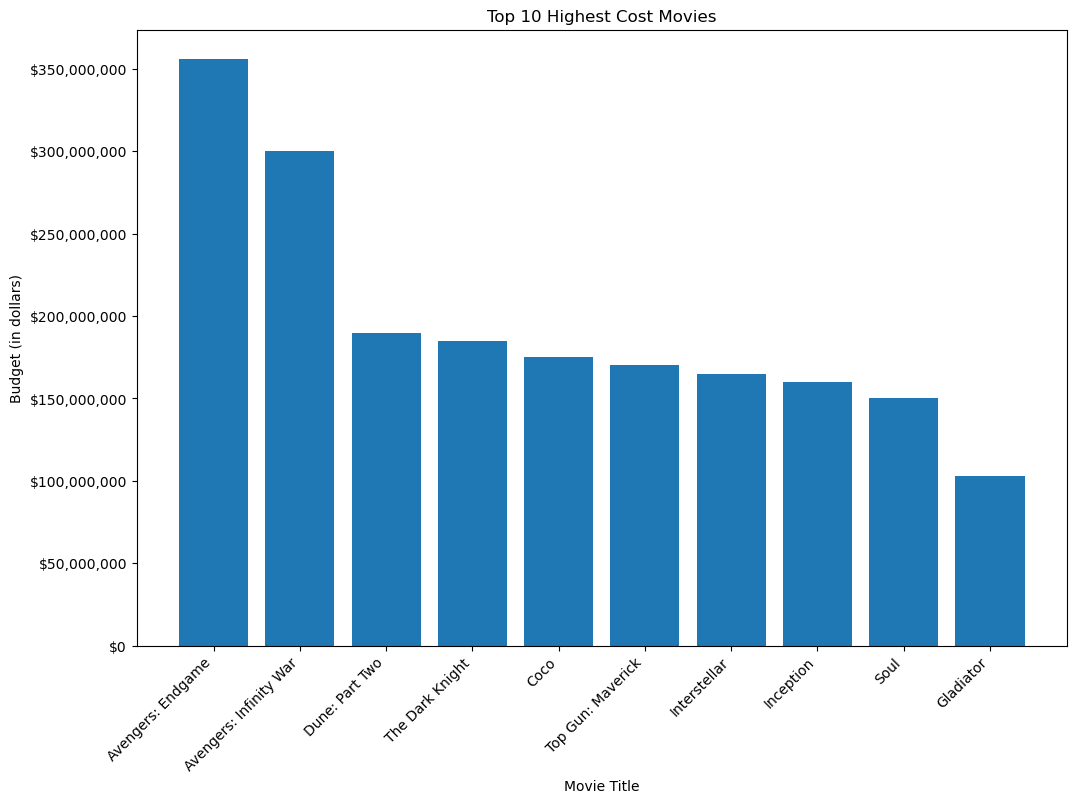

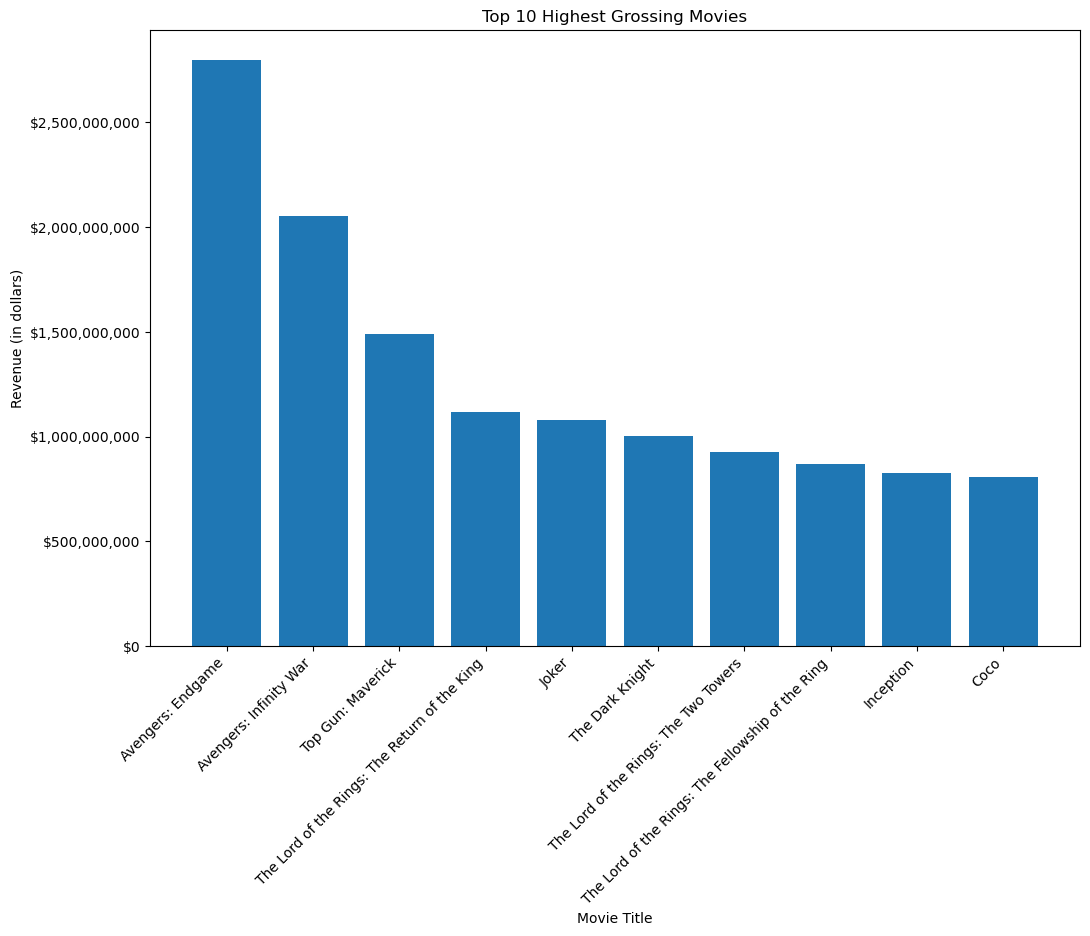

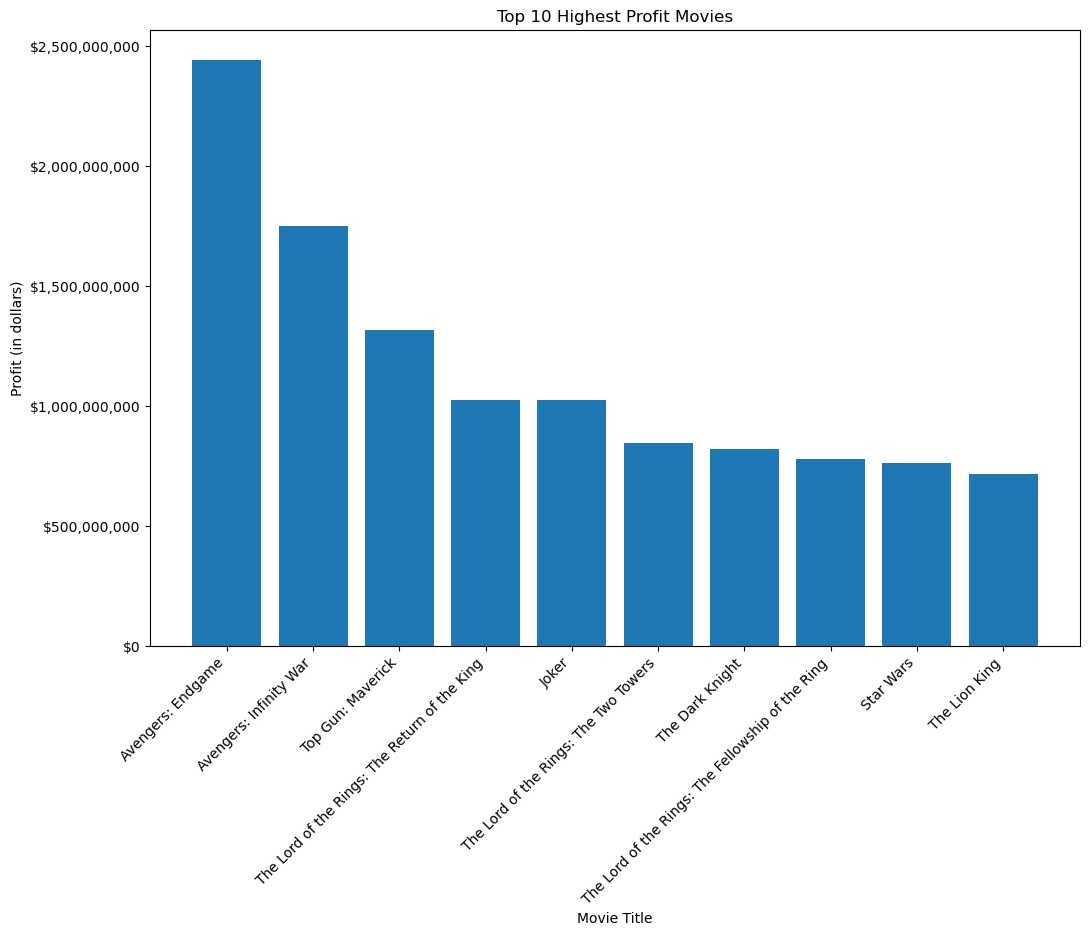

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function to plot top 10 highest cost movies
def plot_top_10_highest_cost_movies(df):
    top_10_cost_movies = df.sort_values(by='budget', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    plt.bar(top_10_cost_movies['title'], top_10_cost_movies['budget'])
    plt.xlabel('Movie Title')
    plt.ylabel('Budget (in dollars)')
    plt.title('Top 10 Highest Cost Movies')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
    plt.show()

# Function to plot top 10 highest grossing movies
def plot_top_10_highest_grossing_movies(df):
    top_10_grossing_movies = df.sort_values(by='revenue', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    plt.bar(top_10_grossing_movies['title'], top_10_grossing_movies['revenue'])
    plt.xlabel('Movie Title')
    plt.ylabel('Revenue (in dollars)')
    plt.title('Top 10 Highest Grossing Movies')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
    plt.show()

# Function to plot top 10 highest profit movies
def plot_top_10_highest_profit_movies(df):
    top_10_profit_movies = df.sort_values(by='profit', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    plt.bar(top_10_profit_movies['title'], top_10_profit_movies['profit'])
    plt.xlabel('Movie Title')
    plt.ylabel('Profit (in dollars)')
    plt.title('Top 10 Highest Profit Movies')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
    plt.show()

# Assuming movie_details_df is the DataFrame containing the cleaned and calculated data

# Plot the charts
plot_top_10_highest_cost_movies(movie_details_df)
plot_top_10_highest_grossing_movies(movie_details_df)
plot_top_10_highest_profit_movies(movie_details_df)
